## Data Exploration and Cleaning


### Loading the library

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import imageio

## Importing the dataset 

We drop the first column as it contains a double index column 

In [2]:
df = pd.read_csv("/Users/liyenglee/Downloads/diabetes_binary.csv")

df = df.drop(df.columns[0], axis=1)

df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
1,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
2,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
3,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
4,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206679,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0
206680,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
206681,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
206682,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


We want to check the positive and negative classes percentage 

In [3]:
positive_count = df['Diabetes_012'].value_counts()[1]
negative_count = df['Diabetes_012'].value_counts()[0]
total_count = len(df)

positive_percent = (positive_count / total_count) * 100
negative_percent = (negative_count / total_count) * 100

print(f"Positive class: {positive_percent:.2f}%")
print(f"Negative class: {negative_percent:.2f}%")

Positive class: 12.72%
Negative class: 87.28%


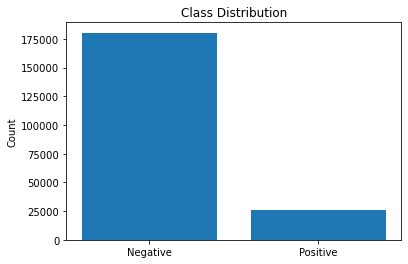

In [4]:
class_counts = df['Diabetes_012'].value_counts()

plt.bar(class_counts.index, class_counts.values)
plt.xticks(class_counts.index, ['Negative', 'Positive'])
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

As the first metric we ran was not very ideal, we are trying to perform down-sampling with the target variable. This is very simplified way to do it. 

In [5]:
df_1 = df.drop(df[df['Diabetes_012'] == 0].sample(n=100000).index)





In [6]:
df_1

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
2,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
3,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0
7,1.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0
9,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,15.0,0.0,0.0,7.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206677,0.0,1.0,1.0,1.0,23.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,4.0,0.0,5.0,0.0,1.0,8.0,3.0,2.0
206679,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0
206680,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
206681,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0


In [7]:
positive_count = df_1['Diabetes_012'].value_counts()[1]
negative_count = df_1['Diabetes_012'].value_counts()[0]
total_count = len(df_1)

positive_percent = (positive_count / total_count) * 100
negative_percent = (negative_count / total_count) * 100

print(f"Positive class: {positive_percent:.2f}%")
print(f"Negative class: {negative_percent:.2f}%")

Positive class: 24.65%
Negative class: 75.35%


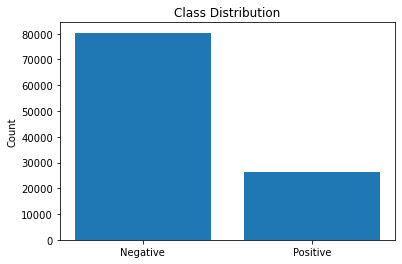

In [8]:
class_counts = df_1['Diabetes_012'].value_counts()

plt.bar(class_counts.index, class_counts.values)
plt.xticks(class_counts.index, ['Negative', 'Positive'])
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

## Sagemaker Studio 

We did not perform further data exploration on Jupyter notebook as we have manage to retrieve some interesting and detailed analysis on Sagemaker Studio through Data Wrangler 

In [10]:
image = imageio.imread('/Users/liyenglee/Downloads/data-wrangler-insights-report.png')

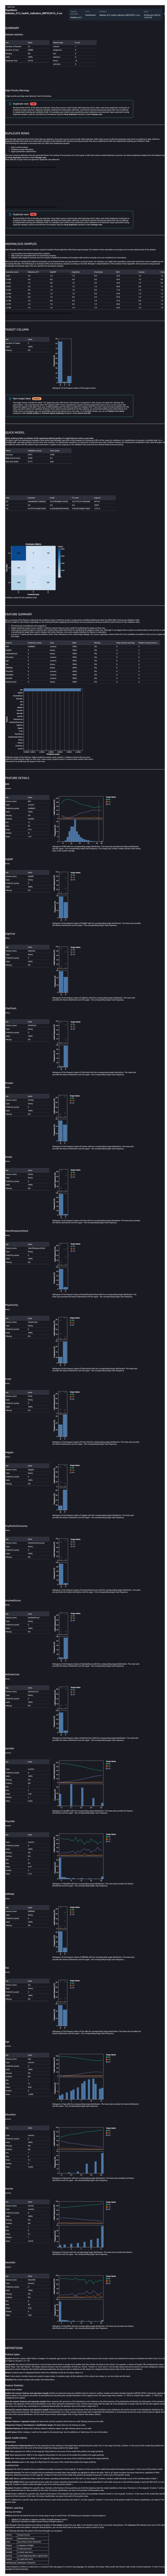

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(150,150))
plt.imshow(image)
ax.axis('off')
plt.show()